In [1]:
import numpy as np
from scipy.optimize import linprog

import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib widget


Bad key axes.color_cycle in file /home/ana/.config/matplotlib/matplotlibrc, line 240 ('axes.color_cycle    : 348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2  # color cycle for plot lines')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution


ModuleNotFoundError: No module named 'ipympl'

# Linear programming

Linear programming (LP) is a mathematical formalism which allows us to minimize a linear function is minimized subject to a number of linear (equality and inequality) constraints. 

**Objective:**
Minimize or maximize the objective function:

$ \mathbf{Z} = \mathbf{c}^T \mathbf{x} $

where:
- $\mathbf{Z}$ is the objective function
- $\mathbf{c} = [c_1, c_2, \ldots, c_n]$ is the coefficient vector of the objective function
- $\mathbf{x} = [x_1, x_2, \ldots, x_n]$ is the decision variable vector

Subject to a number of linear constraints which can be expressed in matrix form as:

$ \mathbf{A}\mathbf{x} \, \leq \, \mathbf{b} $



## Simple example: 2D problem

We will now study a following problem: 

**Maximize** $3x + 4y$ subject to following constraints:
- $4 + 2y \leq 14$
- $3x - y \geq 0$
- $x - y \leq 2$

Let us first visually inspect the feasible region:


interactive(children=(Checkbox(value=False, description='Show objective function'), Checkbox(value=False, desc…

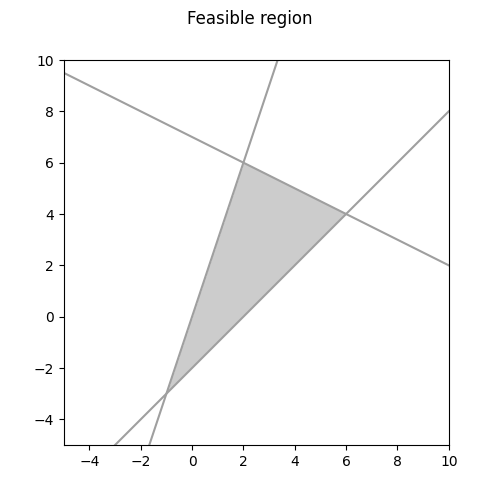

In [12]:

grid = np.linspace(-5,10,300)
x2d, y2d = np.meshgrid(grid, grid)

# reformulate first constraint
y1 = 7 - 0.5 * grid
# reformulate second constraint
y2 = 3 * grid
# reformulate last constraint
y3 = grid - 2

# objective function is a vector
obj_fun = 4/3 * grid

# orthogonal to the objective function
obj_fun_orth = -3/4 * grid + 8.5

# let's plot the lines that are the border of our feasible region:

fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Feasible region')

ax.plot(grid, y1, color='#9f9f9f')
ax.plot(grid, y2, color='#9f9f9f')
ax.plot(grid, y3, color='#9f9f9f')

# let's plot the surface defined by our constraints:
ax.imshow((x2d + 2*y2d <= 14) & (3*x2d - y2d >= 0) & (x2d - y2d <= 2),
		   extent=(x2d.min(), x2d.max(), y2d.min(), y2d.max()),
           origin='lower', cmap='Greys', alpha=0.2)

# finally, let's visualize the objective function
# ax.plot(grid, obj_fun, color='r')

# we display only the interesting region of space
ax.set_xlim((x2d.min(), x2d.max()))
ax.set_ylim(y2d.min(), y2d.max())

# plot the objective function vector
obj_fun_plot, = ax.plot(grid, obj_fun, color='r', label='obj_fun')
obj_fun_plot.set_visible(False)
orth_plot, = ax.plot(grid, obj_fun_orth, '--', color='r', label='obj_fun_orth')
orth_plot.set_visible(False)

@widgets.interact(plot_obj_fun=widgets.Checkbox(description='Show objective function'),
                  plot_orth=widgets.Checkbox(description='Show orthogonal plane'))
def do_smt(plot_obj_fun=False, plot_orth=False):
    obj_fun_plot.set_visible(plot_obj_fun)
    orth_plot.set_visible(plot_orth)

**Let's define the matrices and vectors of the LP problem!**

**Maximize** $3x + 4y$ subject to following constraints:
- $x + 2y \leq 14$
- $3x - y \geq 0$
- $x - y \leq 2$


\begin{align}
\min_{\mathbf{x}} & & \mathbf{c}^T \mathbf{x} \\
\texttt{such that} & & \mathbf{A}\mathbf{x} \, \leq \, \mathbf{b}
\end{align}



Our problem becomes:

Maximize:
$ \begin{bmatrix} 3 & 4 \end{bmatrix} \mathbf{x} $

subject to:

$\begin{bmatrix}
1 & 2 \\
3 & -1 \\
1 & -1 \\
\end{bmatrix}
\mathbf{x}
\begin{bmatrix}
\leq \\
\geq \\
\leq \\
\end{bmatrix}
\begin{bmatrix}
14 \\
0 \\
2 \\
\end{bmatrix}$

Now we need to convert all signs to $\leq$:


$\begin{bmatrix}
1 & 2 \\
-3 & 1 \\
1 & -1 \\
\end{bmatrix}
\mathbf{x}
\begin{bmatrix}
\leq \\
\leq \\
\leq \\
\end{bmatrix}
\begin{bmatrix}
14 \\
0 \\
2 \\
\end{bmatrix}$


Let's write the Python code for solving that!

In [24]:
A_ub = np.array([[1, 2], [-3, 1], [1, -1]])
b_ub = np.array([14, 0, 2])
c = np.array([3, 4])
bounds = [(-np.inf, np.inf), (-np.inf, np.inf)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds= bounds)
print('Optimal value:', round(res.fun, ndigits=2),
      '\nx values:', res.x,
      '\nNumber of iterations performed:', res.nit,
      '\nStatus:', res.message)

Optimal value: -15.0 
x values: [-1. -3.] 
Number of iterations performed: 0 
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)


# Why this point?
Let's go back to our visualization!

In [25]:
res = linprog(-c, A_ub=A_ub, b_ub=b_ub, bounds= bounds)
print('Optimal value:', round(res.fun, ndigits=2),
      '\nx values:', res.x,
      '\nNumber of iterations performed:', res.nit,
      '\nStatus:', res.message)

Optimal value: -34.0 
x values: [6. 4.] 
Number of iterations performed: 3 
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)


# Impact of individual constraints on the solution
We can see from our visualization that not all constraints have the same impact on the optimal solution. There is a numerical way to quantify the impact of each constraint on the optimal value.
Each LP problem has the so-called `shadow prices`. There is a shadow price associated to every constraint. 

If a shadow price for a constraint $c_1: ax + by \leq c$ is 10 - that means that changing the $c_1$ to $ax + by \leq c+1$, the optimal value for the LP problem will decrease by 10.